<a href="https://colab.research.google.com/github/hmh100298/Kmeans2/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/hmh100298/Kmeans2.git

Cloning into 'Kmeans2'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 4), reused 11 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
!pip install python-mnist


In [ ]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from Kmeans2.display_network import *

In [ ]:
mndata = MNIST('/content/Kmeans2')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0 # ma tran 1000 buc anh dau tien
X = X0
#print(X0[1])

K = 10  # so luong clusters
kmeans = KMeans(n_clusters=K).fit(X)
#print(kmeans)
pred_label = kmeans.predict(X) # ket qua du doan cua 1000 buc anh
print(pred_label.shape)  
print(X0.shape)

(1000,)
(1000, 784)


<class 'numpy.ndarray'>
(784, 10)


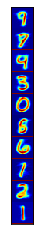

In [ ]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape) # toa do tam cua K cluster ung voi moi features

A = display_network(kmeans.cluster_centers_.T, 10, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(A))


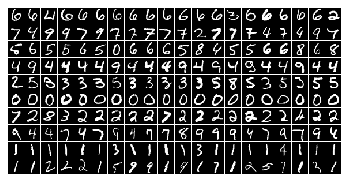

In [ ]:
from sklearn.neighbors import NearestNeighbors

N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))
for k in range(K):
    #print(k)
    Xk = X0[pred_label == k, :] # X0 : 1000 buc anh , pred_label : nhan 1000 buc anh >> nhung buc anh co nhan = k
    center_k = [kmeans.cluster_centers_[k]] # center thu k hay cluster k
    neigh = NearestNeighbors(100).fit(Xk) 
    dist, nearest_id  = neigh.kneighbors(center_k, N0)# tim N0 neighbors gan nhat fit voi xk
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

Compression



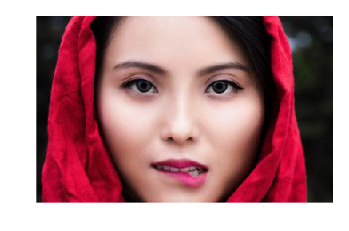

(245, 378, 4)
245
378


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('/content/Kmeans2/testimg.png')
plt.axis('off')
imgplot = plt.imshow(img)
plt.show(imgplot)
print(img.shape)
#print(img.shape[0])
#print(img.shape[1])

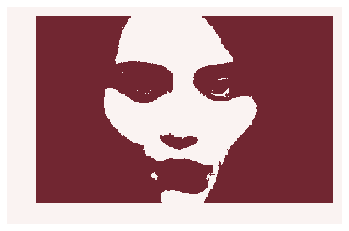

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


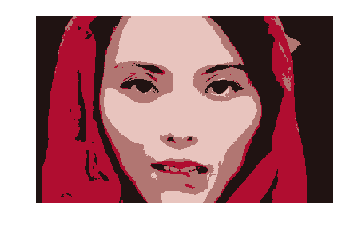

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


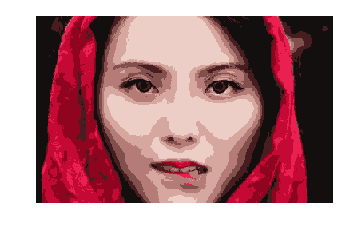

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


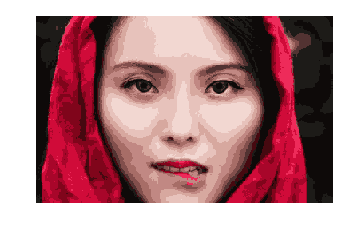

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


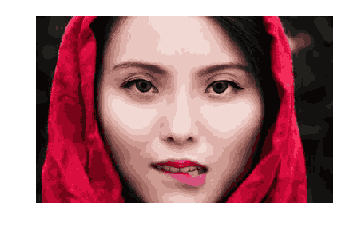

In [ ]:
# 
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2])) # moi hang la 1 pixel voi 3 mau gia tri kkhac nhau
for K in [2, 5, 10, 15, 20]:
  kmeans = KMeans(n_clusters=K).fit(X)
  label = kmeans.predict(X)
  img4 = np.zeros_like(X)
  # replace each pixel by its center
  for k in range(K):
      img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
  img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
  img5=plt.imshow(img5, interpolation='nearest')
  plt.axis('off')
  plt.show(img5)

Object Segmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


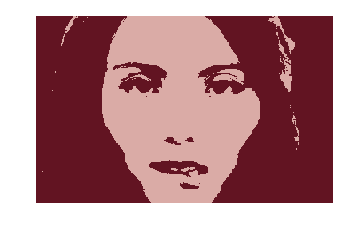

In [ ]:
K = 3
kmeans = KMeans(n_clusters=K).fit(X)
label = kmeans.predict(X)

img4 = np.zeros_like(X)
# replace each pixel by its center
for k in range(K):
    img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
plt.imshow(img5, interpolation='nearest')
plt.axis('off')
plt.show()